To calculate the Point-to-Plane RMSE between LiDAR and Gaussian models, we will:

Load Each Model: Separate processing for heavy datasets.
Estimate Normals: Use the trimesh library for estimating normals for Gaussian models.
Compute Residuals: Calculate point-to-plane distances from LiDAR to Gaussian models.
Calculate Statistics: Compute RMSE, median, and MAD of residuals.
Visualize: Plot a histogram or CDF of the residuals.

In [10]:
# Import necessary libraries
import trimesh
import numpy as np
import matplotlib.pyplot as plt

# Function to compute custom MAD
def custom_mad(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return mad

# Function to estimate normals and compute point-to-plane distances
def compute_point_to_plane_rmse(lidar_mesh, gaussian_mesh):
    # Estimate normals
    lidar_normals = lidar_mesh.vertex_normals

    # Find nearest points from Gaussian model to LiDAR model
    _, closest_points_indices = gaussian_mesh.kdtree.query(lidar_mesh.vertices)
    closest_points = gaussian_mesh.vertices[closest_points_indices]

    # Compute residuals (point-to-plane distances)
    residuals = np.einsum('ij,ij->i', closest_points - lidar_mesh.vertices, lidar_normals)
    
    # RMSE calculation
    rmse = np.sqrt(np.mean(residuals ** 2))
    median_residual = np.median(np.abs(residuals))
    mad = custom_mad(residuals)

    return rmse, median_residual, mad, residuals

# Load Gaussian Models
gaussian_models = {
    'Natural': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Natural/3DGS.ply'),
    'Accidental': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Accidental/3DGS.ply'),
    'Homicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Homicidal/3DGS.ply'),
    'Suicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Suicidal/3DGS.ply'),
    'Undetermined': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Undetermined/3DGS.ply')
}

# Load LiDAR Models
lidar_models = {
    'Natural': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Natural/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Accidental': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Accidental/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Homicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Homicidal/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Suicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Suicidal/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Undetermined': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Undetermined/LiDARPLY/AdvancedExport/3DModel.ply')
}

In [11]:
# Store results
results = {}

for category in gaussian_models.keys():
    # Compute RMSE and other metrics
    rmse, median_residual, mad, residuals = compute_point_to_plane_rmse(lidar_models[category], gaussian_models[category])
    
    # Print results before plotting
    print(f"Model: {category}")
    print(f"RMSE: {rmse:.4f}, Median: {median_residual:.4f}, MAD: {mad:.4f}")
    
    # Save results for visualization
    results[category] = residuals

# Visualization and saving
for category, residuals in results.items():
    plt.figure()
    plt.hist(residuals, bins=50, alpha=0.75, label='Residuals')
    plt.xlabel('Residual (distance)')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram for {category}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Images/{category}_residuals.png', dpi=200)
    plt.close()

Model: Natural
RMSE: 0.9899, Median: 0.3262, MAD: 0.2976
Model: Accidental
RMSE: 0.6806, Median: 0.2129, MAD: 0.2125
Model: Homicidal
RMSE: 0.2482, Median: 0.0886, MAD: 0.0878
Model: Suicidal
RMSE: 0.4233, Median: 0.1170, MAD: 0.1147
Model: Undetermined
RMSE: 0.7888, Median: 0.2334, MAD: 0.2346


In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

In [ ]:
# Store results
results = {'Model': [], 'RMSE': [], 'Median Residual': [], 'MAD': []}

for category in gaussian_models.keys():
    # Compute RMSE and other metrics
    rmse, median_residual, mad, residuals = compute_point_to_plane_rmse(lidar_models[category], gaussian_models[category])
    
    # Append results
    results['Model'].append(category)
    results['RMSE'].append(rmse)
    results['Median Residual'].append(median_residual)
    results['MAD'].append(mad)

    # Save results for visualization
    plt.figure()
    plt.hist(residuals, bins=50, alpha=0.75, label='Residuals')
    plt.xlabel('Residual (distance)')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram for {category}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Images/{category}_residuals.png', dpi=200)
    plt.close()

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Print the results table
print("\nResults Table:")
print(results_df.to_string(index=False))

# Display the saved images (Figures will be saved in the Images directory)
# This section assumes you have access to display or manually check saved files.


Results Table:
       Model     RMSE  Median Residual      MAD
     Natural 0.989945         0.326237 0.297604
  Accidental 0.680575         0.212870 0.212459
   Homicidal 0.248191         0.088637 0.087775
    Suicidal 0.423265         0.116960 0.114675
Undetermined 0.788753         0.233438 0.234583


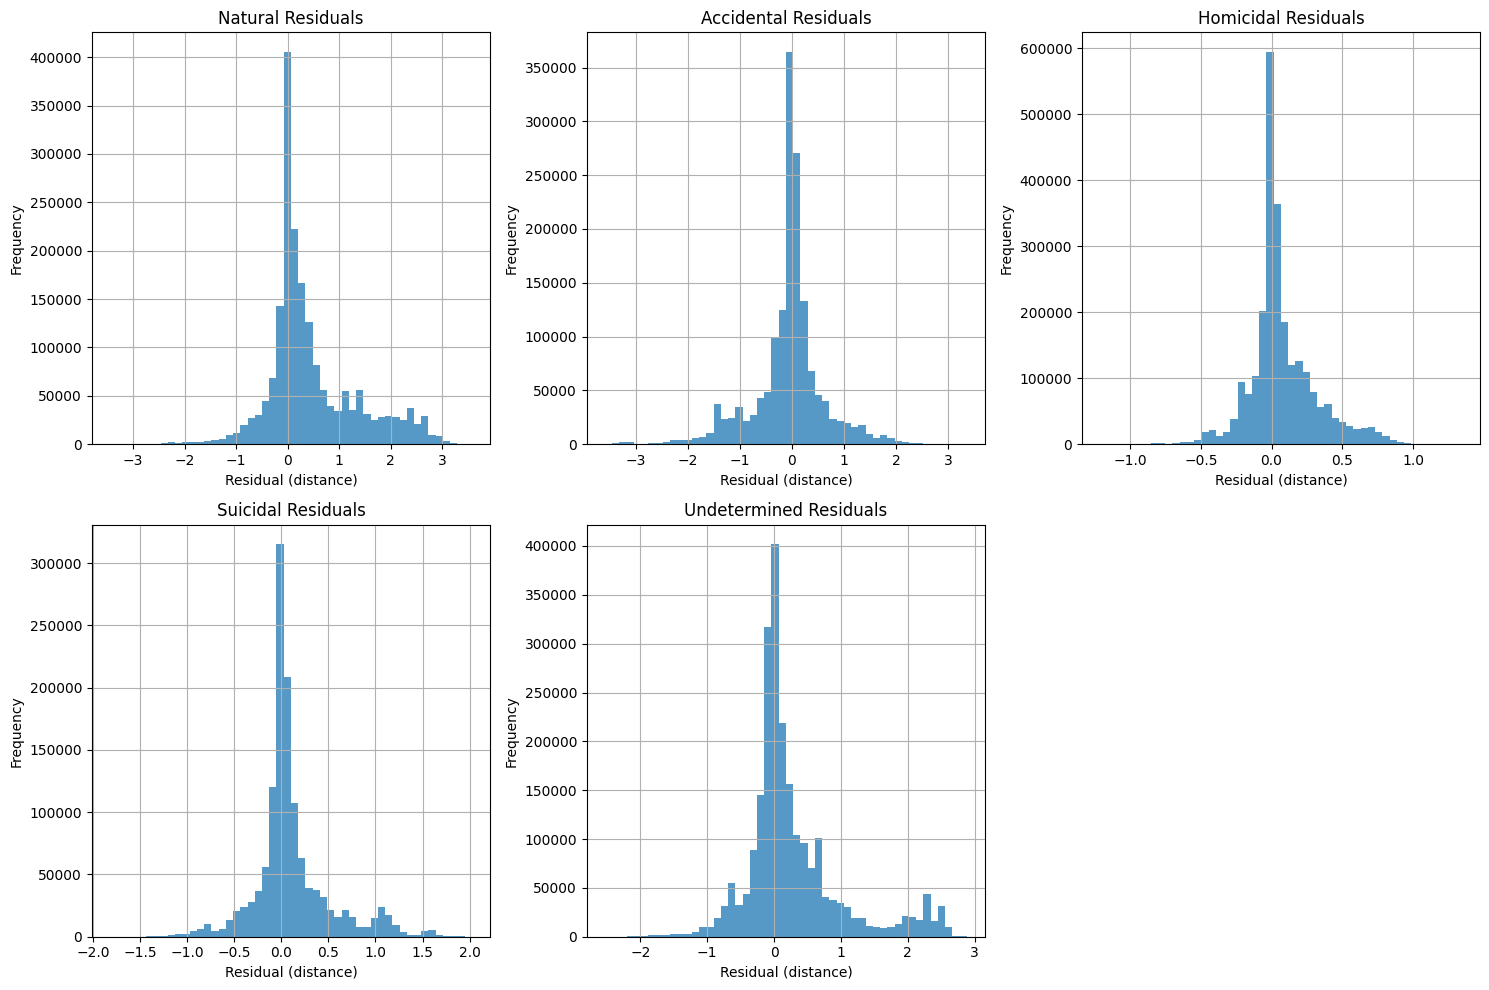

In [16]:
# Import necessary libraries
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Store results
results = {'Model': [], 'RMSE': [], 'Median Residual': [], 'MAD': []}
residuals_dict = {}

for category in gaussian_models.keys():
    # Compute RMSE and other metrics
    rmse, median_residual, mad, residuals = compute_point_to_plane_rmse(lidar_models[category], gaussian_models[category])
    
    # Append results
    results['Model'].append(category)
    results['RMSE'].append(rmse)
    results['Median Residual'].append(median_residual)
    results['MAD'].append(mad)
    
    # Store residuals for visualization
    residuals_dict[category] = residuals

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Print the results table
print("\nResults Table:")
print(results_df.to_string(index=False))

# Plot combined figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for idx, (category, residuals) in enumerate(residuals_dict.items()):
    axes[idx].hist(residuals, bins=50, alpha=0.75)
    axes[idx].set_title(f'{category} Residuals')
    axes[idx].set_xlabel('Residual (distance)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True)

# Hide any extra subplot space
if len(residuals_dict) < len(axes):
    for ax in axes[len(residuals_dict):]:
        ax.set_visible(False)

plt.tight_layout()
plt.savefig('Images/combined_residuals.png', dpi=200)
plt.show()